Тема урока: обработка исключений
Обработка исключений
Конструкция try-except
Основные типы исключений
Аннотация. Урок посвящен работе с исключениями.

Обработка исключений

Далеко не для каждой ошибки можно выполнить обработку так, чтобы программа продолжала выполняться. Однако в некоторых случаях такая обработка может быть выполнена. Собственно, о таких потенциально "отлавливаемых" ошибках, их перехвате и обработке будет идти речь в этом уроке.

Общая идея, заложенная в основу метода обработки исключений, такая: программный код, в котором теоретически может возникнуть ошибка, выделяется специальным образом – "берется на контроль". Если при выполнении этого программного кода ошибка не возникает, то ничего особенного не происходит. Если при выполнении "контролируемого" кода возникает ошибка, то выполнение кода останавливается и автоматически создается объект-исключение, содержащий описание возникшей ошибки.

С практической точки зрения мы можем думать об исключении как о некотором сообщении, которое генерируется интерпретатором Python в силу возникшей ошибки при выполнении кода или из-за некоторых других обстоятельств, близких по своей природе к ошибке выполнения кода. Хотя ошибка и исключение – это не одно и то же (исключение является
следствием ошибки), мы обычно отождествляем эти понятия.

Для обработки исключительных ситуаций в языке Python используется конструкция try-except. Существуют разные вариации использования этой конструкции. Мы начнем с наиболее простой.

После ключевого слова try и двоеточия размещается блок программного кода, который мы подозреваем на предмет возможного возникновения ошибки. Этот код будем называть контролируемым. По завершении этого блока указывается ключевое слово except (с двоеточием), после которого идет еще один блок программного кода. Этот код будем называть кодом обработки ошибки (исключения).

In [ ]:
try:
    # контролируемый код
except:
    # код обработки ошибки (исключения)

Если при выполнении кода в блоке try ошибка не возникла, то код обработки ошибки (исключения) в блоке except выполняться не будет. Если при выполнении кода в блоке try возникла ошибка, то выполнение кода trу блока прекращается, и выполняется код обработки ошибки (исключения) в блоке except. После этого управление передается следующей команде после конструкции try-except

Рассмотрим пример использования инструкции try-except. Контролируемый код содержит считывание данных от пользователя с последующей конвертацией к числовому типу int и выводом частного введенных чисел.

In [ ]:
try:
    num1 = int(input())
    num2 = int(input())
    print('Частное чисел равно', num1 / num2)
except:
    print('Вы ввели некорректные данные!')

print('Работа программы завершена!')

Ситуация 3. На вход подаются два целых числа, второе из которых ноль, например 10 и 0. Тогда результатом выполнения кода будет:

Вы ввели некорректные данные!
Работа программы завершена!

Обратите внимание на последнюю строчку программного кода, она находится вне конструкции try-except и будет выполняться всегда независимо от того, произошла ошибка или нет.

Схема обработки ошибок (исключений), описанная выше, во многом проста и удобна. Но она не лишена недостатков. В первую очередь сразу бросается в глаза, что разные ошибки (исключения) обрабатываются одинаково. То есть, какая бы ни возникла ошибка (исключение), реакция программы будет одна и та же.

Обработка нескольких исключений

Более утонченная обработка ошибок (исключительных ситуаций) подразумевает более индивидуальный подход. Речь идет о том, чтобы обработка ошибок базировалась на типе или характере ошибки. Разумеется, это возможно. Причем описанная выше схема обработки исключений претерпевает минимальные изменения. В конструкции try-except после блока try указывается несколько ехсерt блоков, причем для каждого блока явно указывается тип ошибки (исключения), который обрабатывается в этом блоке. Ключевое слово, определяющее тип ошибки, указывается после ключевого слова except соответствующего блока.

In [ ]:
try:
    # контролируемый код
except тип_ошибки_1:
    # код обработки ошибки (исключения)
except тип_ошибки_2:
    # код обработки ошибки (исключения)
...
except тип_ошибки_n:
    # код обработки ошибки (исключения)

Этот код выполняется следующим образом. Выполняются команды trу блока. Если возникла ошибка, то выполнение команд trу блока прекращается и начинается последовательный просмотр ехсерt блоков на предмет совпадения типа ошибки, которая возникла, и типа ошибки, указанного после ключевого слова в ехсерt блоке. Как только совпадение найдено, выполняются команды соответствующего ехсерt блока, после чего управление переходит к команде после конструкции try-except.

Если при переборе ехсерt блоков совпадение по типу ошибки не найдено, выполнение кода прекращается и появляется сообщение об ошибке. Если при выполнении trу блока ошибок не было, коды в ехсерt блоках не выполняются.

In [ ]:
try:
    num1 = int(input())
    num2 = int(input())
    print('Частное чисел равно', num1 / num2)
except ValueError:
    print('Нужно было ввести числа!')
except ZeroDivisionError:
    print('На ноль делить нельзя!')

print('Работа программы завершена!')

Как мы видим, по сравнению с предыдущим примером изменилась только та часть кода, что связана с ехсерt блоками. Теперь мы имеем два except блока. После первого ключевого слова except указано название ValueError. К типу ValueError относятся ошибки, возникающие при передаче в функцию аргумента с неподдерживаемым значением. Во втором ехсерt блоке обрабатываются ошибки типа ZeroDivisionError. К этому типу относятся ошибки, возникающие при попытке выполнить деление на ноль.

Для каждого ехсерt блока предлагается свой программный код (в обоих случаях выводится сообщение с информацией о том, что произошло). При выполнении кода в блоке try если произошла ошибка, тип этой ошибки сначала сопоставляется с типом ошибки ValueError в первом ехсерt блоке. Если совпадение есть, то выполняется код этого блока. Если совпадения нет, проверяется совпадение типа ошибки с классом ошибки ZeroDivisionError во втором ехсерt блоке. Если есть совпадение – выполняется код данного ехсерt блока. Если же и здесь совпадения нет, выполнение программы завершается и появляется автоматически сгенерированное интерпретатором сообщение об ошибке.

Стоит также обратить внимание на следующее обстоятельство: обрабатываются в данном случае только ошибки типов ValueError и ZeroDivisionError. Если бы теоретически возникла ошибка какого-то иного типа, то она бы перехвачена не была.

В рассмотренном выше примере мы создали для разных типов ошибок разные ехсерt блоки. Иногда приходится для нескольких типов ошибок создавать один ехсерt блок. В этом случае после ключевого слова except в круглых скобках через запятую перечисляются те типы ошибок, для которых выполняется обработка в данном блоке.

In [ ]:
try:
    num1 = int(input())
    num2 = int(input())
    print('Частное чисел равно', num1 / num2)
except (ValueError, IndexError, KeyError):
    print('Тут обрабатываются сразу три типа ошибок!')
except ZeroDivisionError:
    print('На ноль делить нельзя!')
except:
    print('Если не сработал ни один из предыдущих блоков except.')

print('Работа программы завершена!')

Обратите внимание также на последний блок except. Он будет обрабатывать любой тип исключения, отличный от указанных выше, причем такой блок должен быть только один, иначе возникнет ошибка (исключение) SyntaxError

Основные типы исключений

Что касается типов исключений, наибольший интерес с практической точки зрения представляют следующие:

IndexError: возникает, когда индекс (например, для элемента списка) указан неправильно (выходит за границы допустимого диапазона)
KeyError: возникает при неверно указанном ключе словаря
NameError: возникает, если не удается найти переменную с некоторым названием
SyntaxError: возникает при наличии в исходном коде синтаксических ошибок
TypeError: возникает при несоответствии типов, когда для обработки требуется значение определенного типа, а передается значение другого типа
FileNotFoundError: возникает при открытии несуществующего файла
ValueError: возникает, когда в функцию передается аргумент с неподдерживаемым значением
ZeroDivisionError: возникает при попытке выполнить деление на ноль

Примечания

Примечание 1. Помимо "возникло исключение", в отношении исключений также часто говорят "было возбуждено исключение".

Примечание 2. Важно понимать разницу между типами исключений TypeError и ValueError

Исключение TypeError возникает, когда встроенная функция (или операция) применяется к объекту неподходящего типа.

In [1]:
print('beegeek' + 2022)

TypeError: can only concatenate str (not "int") to str

Исключение ValueError возникает, когда встроенная функция (или операция) получает аргумент правильного типа, но с неподходящим значением, и ситуация не описывается более точным исключением, например, таким как IndexError.

In [2]:
num = int('beegeek')

ValueError: invalid literal for int() with base 10: 'beegeek'

In [3]:
nums = [1, 2, 3]

print(nums[7])

IndexError: list index out of range

Примечание 4. При работе с исключениями бывает удобно иногда использовать оператор pass, равноценный отсутствию операции. В ходе исполнения данного оператора ничего не происходит, поэтому он может использоваться в качестве заглушки в тех местах, где это синтаксически необходимо, например, в инструкциях, где тело является обязательным, таких как def, except, with и т.д:

In [ ]:
def do_something():
    pass  

try:
    print('beegeek')
except:
    pass

with open('beegeek.txt') as file:
    pass

Примечание 5. Обработчики исключений обрабатывают исключения не только в том случае, если они возникают непосредственно в блоке try, но и в том случае, если они возникают внутри функций, вызываемых в блоке try.

In [4]:
def this_fails():
    num = 1 / 0

try:
    this_fails()
except ZeroDivisionError:
    print('Деление на ноль')

Деление на ноль


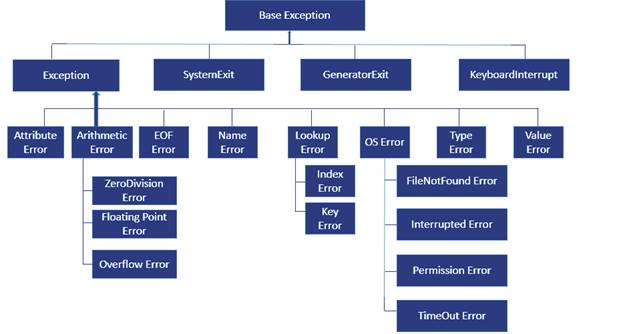

In [7]:
from functions import picture
picture('image002.jpg')

Вам доступна программа, которая находит сумму всех значений по ключу Likes из всех словарей списка blog_posts. Если словарь не содержит ключа Likes, его значение считается равным минус единице. Дополните приведенный ниже код конструкцией try-except, чтобы он выполнился без ошибок.

In [ ]:
blog_posts = [{'Photos': 3, 'Likes': 21, 'Comments': 2}, 
              {'Likes': 13, 'Comments': 2, 'Shares': 1}, 
              {'Photos': 5, 'Likes': 33, 'Comments': 8, 'Shares': 3}, 
              {'Comments': 4, 'Shares': 2}, 
              {'Photos': 8, 'Comments': 1, 'Shares': 1}, 
              {'Photos': 3, 'Likes': 19, 'Comments': 3}]

total_likes = 0

for post in blog_posts:
    try:
        total_likes += post['Likes']
    except:
        total_likes -= 1

print(total_likes)

Вам доступна программа, которая добавляет в список fifth пятую букву каждого слова из списка food. Если слово не имеет пятой буквы, этой буквой считается символ _. Дополните приведенный ниже код конструкцией try-except, чтобы он выполнился без ошибок.

In [ ]:
food = ['chocolate', 'chicken', 'corn', 'sandwich', 'soup', 'potatoes', 'beef', 'lox', 'lemonade']
fifth = []

for x in food:
    try:
        fifth.append(x[4])
    except:
        fifth.append('_')

print(fifth)

Вам доступна программа, которая добавляет в список remainders остаток от деления 36 на каждое число из списка numbers. Если число равно нулю, оно игнорируется. Дополните приведенный ниже код конструкцией try-except, чтобы он выполнился без ошибок.

In [ ]:
numbers = [6, 0, 36, 8, 2, 36, 0, 12, 60, 0, 45, 0, 3, 23]

remainders = []

for number in numbers:
    try:
        remainders.append(36 % number)
    except:
        pass # continue

print(remainders)

Only numbers
На вход программе подается неопределенное количество строк, каждая из которых содержит произвольное значение. Напишите программу с использованием конструкции try-except, которая выводит сумму всех введенных чисел, а затем — количество введенных нечисловых значений.

Формат входных данных
На вход программе подается неопределенное количество строк (хотя бы одна), каждая из которых содержит произвольное значение.

Формат выходных данных
Программа должна вывести сумму всех введенных чисел (тип int и float), а затем на следующей строке — количество введенных нечисловых значений.

Примечание 1. Если ни одно число введено не было, то сумма равна 0.

Примечание 2. Рассмотрим первый тест. Имеем три введенных числа, сумма которых равна: 100+10+1.1=111.1
Также три нечисловых значения, а именно: i'm number!, [1, 99], {'math', 'physics'}

In [ ]:
from sys import stdin

lst = [i.strip() for i in stdin.readlines()]
print(lst)

numbers = list()
not_numbers = list()

for item in lst:
    try:
        numbers.append(float(item))
    except:
        not_numbers.append(item)

check = sum(numbers)
if check.is_integer():
    print(int(check))
else: print(check)
print(len(not_numbers))

In [ ]:
import sys
s, counter = 0, 0
for line in sys.stdin:
    try:
        s += int(line)
    except ValueError:
        try:
            s += float(line)
        except ValueError:
            counter += 1
print(s)
print(counter)